# Projeto: Análises Jogada-Jogada NBB 2019

Para esse projeto estaremos analisando jogos do NBB, principal campeonato brasileiro de basquetebol. Os dados contém os seguintes campos:

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import re

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
# df = pd.read_csv("Total_de_acao_acao.csv")

In [5]:
df = pd.read_csv("tabela_1_Minas_x_Flamengo.csv")

In [6]:
df

,Unnamed: 0,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome
0,0,4,00:00,85,93,NaN,fim_partida,NaN
1,1,4,00:00,85,93,NaN,fim_quarto,NaN
2,2,4,00:01,85,93,MIN,3_Pts_T,Queirós
3,3,4,00:05,85,93,FLA,LL_Pts_C,Marquinhos
4,4,4,00:05,85,92,FLA,LL_Pts_C,Marquinhos
...,...,...,...,...,...,...,...,...
477,477,1,10:00,0,0,MIN,substituicao_entra,Leandrinho
478,478,1,10:00,0,0,MIN,substituicao_entra,Alex
479,479,1,10:00,0,0,MIN,substituicao_entra,Davi
480,480,1,10:00,0,0,MIN,substituicao_entra,Tyrone


In [7]:
# mudança do tempo
# colocar todos em segundos para facilitar a vida
# primeiro evitar NAN (acredite!!! tem isso no site)
df.dropna(subset=['Tempo'], inplace=True)

In [8]:
# tem jogos que o site apresenta numeros inteiros (1, 12, 134, 1000)
# para isso localizei o valores errados e concertei
mudar_hora = []
for x in df['Tempo']:
    if re.findall(r'..:..', x):
        mudar_hora.append(x)
    else:
        if re.findall(r'....', x):
            x = x[0:2] + ':' + x[2:4]
            mudar_hora.append(x)
        elif re.findall(r'...', x):
            x = '0' + x[0] + ':' + x[1:3]
            mudar_hora.append(x)
        elif re.findall(r'..', x):
            x = '00:' + x
            mudar_hora.append(x)
        elif re.findall(r'.', x):
            x = '00:0' + x
            mudar_hora.append(x)

df['Tempo_2'] = mudar_hora
df.drop('Tempo', axis=1, inplace=True)

In [9]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.datetime.strptime(x, '%M:%S'))

In [10]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.time(x.hour, x.minute, x.second))

In [11]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: (x.hour * 60 + x.minute) * 60 + x.second)

In [12]:
# transforma os dados para números inteiros
df['Quarto'] = df['Quarto'].apply(lambda l: int(l))

In [13]:
# modificar o tempo decrescente para crescente (* -1)
# acrescentar o tempo de cada quarto (primeiro quarto termina em 600s, o segundo quarto 2*600 = 1200 ...)
tempo_novo = []
for x, y in zip(df['Quarto'], df['Tempo_2']):
    if x == 1:
        a = (y - (600 * 1)) * -1
        tempo_novo.append(a)
    elif x == 2:
        a = (y - (600 * 2)) * -1
        tempo_novo.append(a)
    elif x == 3:
        a = (y - (600 * 3)) * -1
        tempo_novo.append(a)
    elif x == 4:
        a = (y - (600 * 4)) * -1
        tempo_novo.append(a)
    elif x == 5:
        a = (y - (600 * 5)) * -1
        tempo_novo.append(a)
    elif x == 6:
        a = (y - (600 * 6)) * -1
        tempo_novo.append(a)
    elif x == 7:
        a = (y - (600 * 7)) * -1
        tempo_novo.append(a)

df['Tempo'] = tempo_novo
df.drop('Tempo_2', axis=1, inplace=True)

In [14]:
# deixando o DataFrame nessa ordem de colunas
df = df[['Quarto', 'Tempo', 'placar_casa', 'placar_visitante', 'Time', 'Indicador', 'Nome']]

In [15]:
df['dif_casa'] = df['placar_casa'] - df['placar_visitante']
df['dif_visitante'] = df['placar_visitante'] - df['placar_casa']

In [16]:
df

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,dif_casa,dif_visitante
0,4,2400,85,93,NaN,fim_partida,NaN,-8,8
1,4,2400,85,93,NaN,fim_quarto,NaN,-8,8
2,4,2399,85,93,MIN,3_Pts_T,Queirós,-8,8
3,4,2395,85,93,FLA,LL_Pts_C,Marquinhos,-8,8
4,4,2395,85,92,FLA,LL_Pts_C,Marquinhos,-7,7
...,...,...,...,...,...,...,...,...,...
477,1,0,0,0,MIN,substituicao_entra,Leandrinho,0,0
478,1,0,0,0,MIN,substituicao_entra,Alex,0,0
479,1,0,0,0,MIN,substituicao_entra,Davi,0,0
480,1,0,0,0,MIN,substituicao_entra,Tyrone,0,0


In [17]:
pontuacao = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') | 
               (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_C') |
               (df['Indicador'] == 'LL_Pts_C') | (df['Indicador'] == 'LL_Pts_C')]

In [18]:
pontuacao

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,dif_casa,dif_visitante
2,4,2399,85,93,MIN,3_Pts_T,Queirós,-8,8
3,4,2395,85,93,FLA,LL_Pts_C,Marquinhos,-8,8
4,4,2395,85,92,FLA,LL_Pts_C,Marquinhos,-7,7
12,4,2381,85,91,MIN,3_Pts_T,Alex,-6,6
18,4,2376,85,91,FLA,LL_Pts_C,Mineiro,-6,6
...,...,...,...,...,...,...,...,...,...
455,1,114,1,5,MIN,LL_Pts_C,Scott,-4,4
458,1,100,0,5,FLA,3_Pts_C,Zach Graham,-5,5
464,1,62,0,2,FLA,2_Pts_C,Olivinha,-2,2
466,1,47,0,0,MIN,3_Pts_T,Davi,0,0


In [19]:
# pontuacao.to_csv('tempo2.csv')

In [20]:
# a.set_index("Tempo", inplace=True)

In [21]:
# a[['placar_casa', 'placar_visitante']].plot()

In [22]:
pontuacao.set_index("Tempo", inplace=True)
quartos = [600, 1200, 1800, 2400]

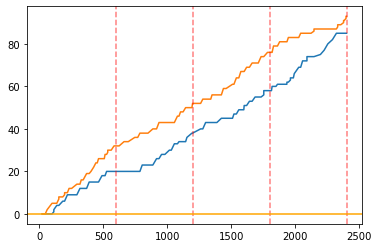

In [23]:
fig, ax = plt.subplots()
x = pontuacao.index
y = pontuacao[['placar_casa', 'placar_visitante']]
ax.plot(x, y)
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.5)
plt.axhline(0, color='orange', label=pontuacao.index)


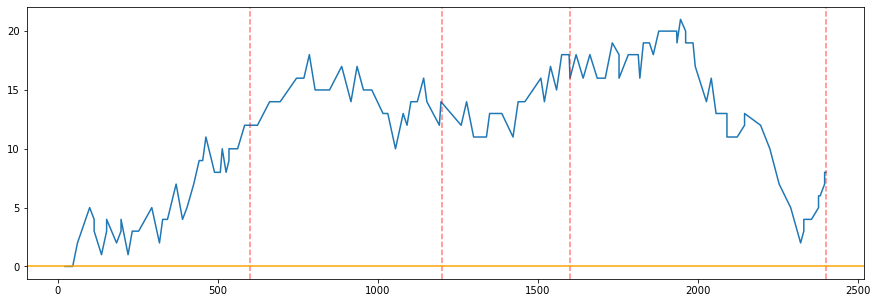

In [24]:
plt.figure(figsize=(15,5))
plt.plot(pontuacao['dif_visitante'])
quartos = [600, 1200, 1600, 2400]
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.5)
plt.axhline(0, color='orange', label=pontuacao.index)

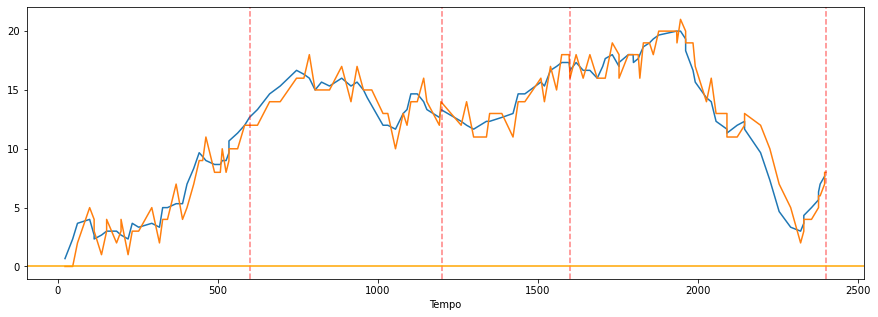

In [25]:
plt.figure(figsize=(15,5))
media_movel = pontuacao['dif_visitante'].rolling(window=3).mean().plot()
pontuacao['dif_visitante'].plot()
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.5)
plt.axhline(0, color='orange', label=pontuacao.index)

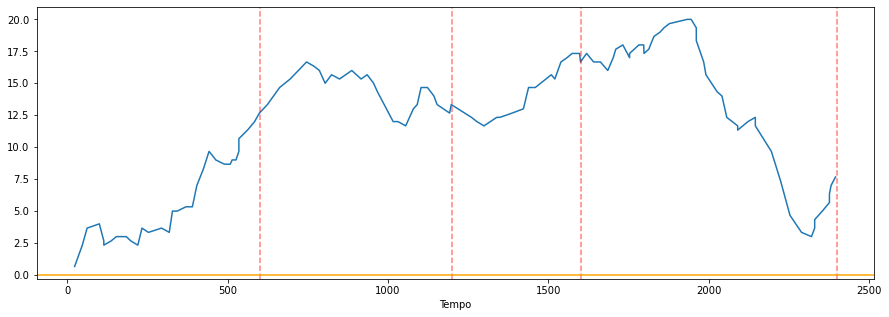

In [26]:
plt.figure(figsize=(15,5))
media_movel = pontuacao['dif_visitante'].rolling(window=3).mean().plot()
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.5)
plt.axhline(0, color='orange', label=pontuacao.index)

In [27]:
periodo_positivos = []
media_movel = pontuacao['dif_visitante'].rolling(window=5).mean()

In [28]:
a = 5
periodo = []
quantos_periodos = 1
for x in pontuacao['dif_visitante']:
    if x >= 5:
        d = x - a
        periodo.append(d)
    else:
        print('oi sumido')

oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido
oi sumido


In [29]:
for y in periodo:
    print(y)

3
3
2
1
1
0
0
2
5
7
8
7
6
6
8
8
11
9
12
14
14
15
16
14
15
15
13
14
14
11
13
13
13
13
11
12
13
14
11
11
11
13
11
13
11
13
13
10
12
9
11
9
9
6
8
8
6
6
9
7
9
7
9
11
9
9
7
8
5
8
8
10
10
10
12
9
12
10
10
10
13
11
11
9
9
7
7
7
5
5
4
3
5
3
3
6
4
4
2
0
2
0
0


In [30]:
aa

NameError: name 'aa' is not defined

In [ ]:
aaa

In [ ]:
posse_bola = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') | 
                (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_C') |
                (df['Indicador'] == 'LL_Pts_C') | (df['Indicador'] == 'LL_Pts_C') |
                (df['Indicador'] == 'ER') | (df['Indicador'] == 'fim_quarto') |
                (df['Indicador'] == 'inicio_partida') | (df['Indicador'] == 'inicio_quarto') |
               

In [ ]:
posse_bola["diferenca"] = posse_bola["Tempo"].diff(-1)

In [ ]:
posse_bola.to_csv('tempo2.csv')

In [ ]:
filtro = (posse_bola['diferenca'] >= 1) | (posse_bola['Indicador'] == 'inicio_partida') | (posse_bola['Indicador'] == 'fim_quarto')
valor_posse_bola = posse_bola[filtro]

In [ ]:
valor_posse_bola

In [ ]:
valor_posse_bola.to_csv('valor_posse_bola.csv')

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(valor_posse_bola['Tempo'], valor_posse_bola['diferenca'])

In [ ]:
Flamengo = df.query("Time == 'FLA'")

In [ ]:
placar_flamengo = Flamengo[(Flamengo['Indicador'] == '3_Pts_C') | (Flamengo['Indicador'] == '3_Pts_T') | 
                (Flamengo['Indicador'] == '2_Pts_C') | (Flamengo['Indicador'] == '2_Pts_C') |
                (Flamengo['Indicador'] == 'LL_Pts_C') | (Flamengo['Indicador'] == 'LL_Pts_C')]

In [ ]:
placar_flamengo

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=placar_flamengo, x="Tempo", y="placar_casa")

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=placar_flamengo, x="Tempo", y="placar_visitante")

In [ ]:
Flamengo = df.query("Time == 'FLA'").sort_values(by=['Tempo'])

In [ ]:
placar_flamengo = Flamengo[(Flamengo['Indicador'] == '3_Pts_C') | (Flamengo['Indicador'] == '3_Pts_T') | 
                (Flamengo['Indicador'] == '2_Pts_C') | (Flamengo['Indicador'] == '2_Pts_C') |
                (Flamengo['Indicador'] == 'LL_Pts_C') | (Flamengo['Indicador'] == 'LL_Pts_C')]

In [ ]:
placar_flamengo.set_index("Tempo", inplace=True)

In [ ]:
placar_flamengo_valor = placar_flamengo['placar_casa']

In [ ]:
placar_flamengo_valor

In [ ]:
plt.figure(figsize=(15,5))
flamengo_media_movel = placar_flamengo_valor.plot()

In [ ]:
flamengo_media_movel = placar_flamengo_valor.rolling(window=10).mean()

In [ ]:
flamengo_media_movel

In [ ]:
flamengo_dev_pad = placar_flamengo_valor.rolling(window=10).std()

In [ ]:
flamengo_dev_pad

In [ ]:
under_line = (flamengo_media_movel-flamengo_dev_pad)
over_line = (flamengo_media_movel+flamengo_dev_pad)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(flamengo_media_movel, linewidth=2)
plt.fill_between(flamengo_dev_pad, under_line, over_line, color='b', alpha=.1) #std curves.

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(flamengo_media_movel, linewidth=2) #mean curve.
plt.fill_between(flamengo_dev_pad.index, under_line, over_line, color='b', alpha=.1) #std curves.